## Warping tutorial
#### b_example_warping

##### April 2020
###### Eva Chamorro - Daniel Zitterbart - Julien Bonnel

## 1. Import packages

In [1]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from warping_functions import *
from time_frequency_analysis_functions import *
import warnings
warnings.filterwarnings('ignore')

## 2. Load simulated signal

In [2]:
data = sio.loadmat(os.getcwd() + '/sig_pek_for_warp.mat')

'''
  s_t: propagated modes in a Pekeris waveguide with parameters
     c1, c2, rho1, rho2: sound speed / density
     D: depth
     r: range
     zs, zr: source/receiver depth
   s_t_dec: same than s_t, except that time origin has been set for warping
   fs: sampling frequency

   NB: one can run optional_create_simulated_signal.m to generate another
   simulated signal

    '''

# Select variables 

s_t_dec = data['s_t_dec']
fs = data['fs']
r = data['r']
c1 = data['c1']

print('Continue')

Continue


## 3. Plot time series

The code has loaded a signal propagated in a Pekeris waveguide
and shows the time series


/Users/evachamorro/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


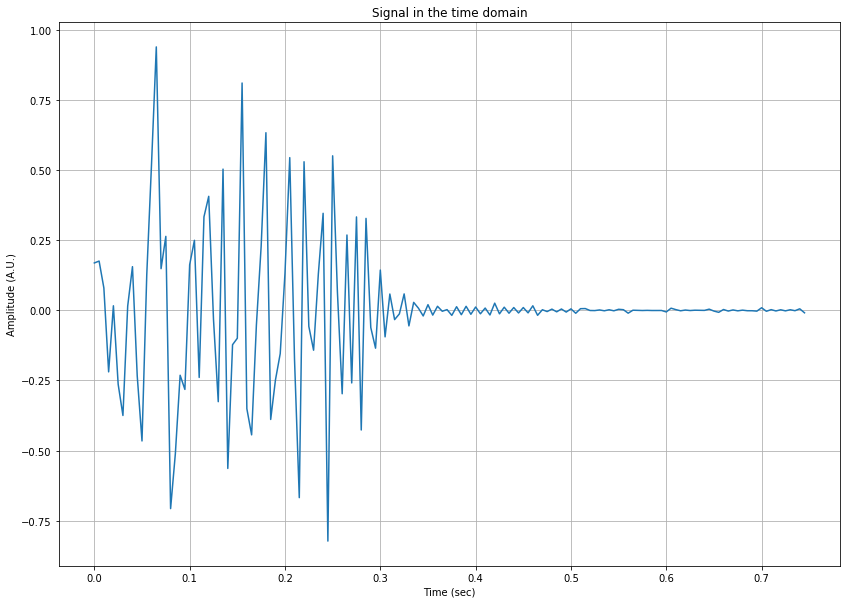

Continue to proceed with warping


In [3]:
# The first sample of s_t_dec corresponds to time r/c1

# Make the signal shorter, no need to keep samples with zeros
N_ok = 150;
s_ok = s_t_dec[0, 0:N_ok]
s_ok = s_ok[np.newaxis, :]

# Corresponding time and frequency axis
time = np.arange(0, N_ok ) / fs

print('The code has loaded a signal propagated in a Pekeris waveguide')
print('and shows the time series')


# Now, let's have a look at it
plt.figure(figsize=(14, 10))
plt.plot(time[0, :], s_ok[0, :])
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (A.U.)')
plt.title('Signal in the time domain')
plt.grid()
plt.show()

print('Continue to proceed with warping')

## 4. Warping

This is the time series of the warped signal
It is a stretched version on the original signal



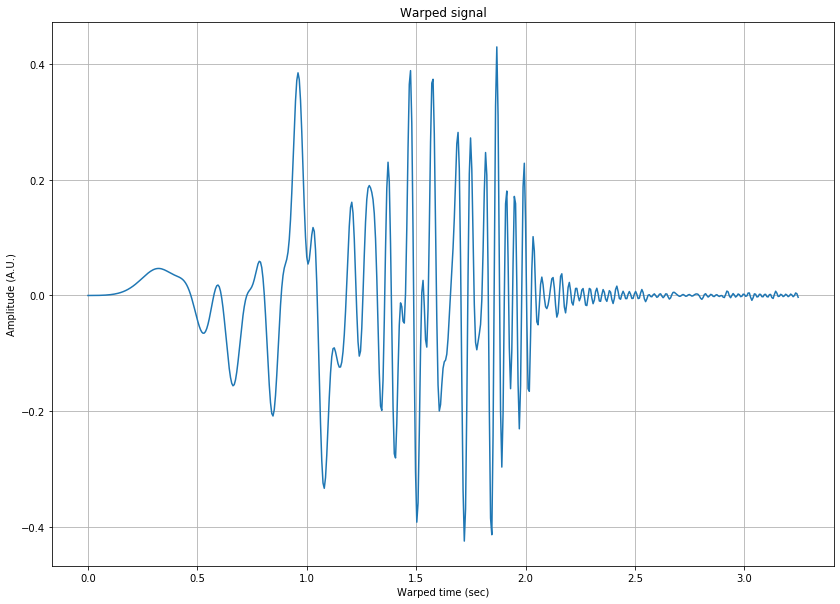

Continue to proceed with spectrograms


In [4]:
# The warped signal will be s_w
s_w, fs_w = warp_temp_exa(s_ok, fs, r, c1)
M = len(s_w)
time_w = np.arange(0, M) / fs_w  ## time axis of the warped signal

print('This is the time series of the warped signal')
print('It is a stretched version on the original signal')
print('')

plt.figure(figsize=(14, 10))
plt.plot(time_w[0, :], s_w[:, 0])
plt.xlabel('Warped time (sec)')
plt.ylabel('Amplitude (A.U.)')
plt.title('Warped signal')
plt.grid()
plt.show()

print('Continue to proceed with spectrograms')

## 5. Spectrograms

Here are the spectrograms
Note that window length is highly different for
the spectrogram of the original signal and the 
spectrogram of the warped signal (look at codes and comments)



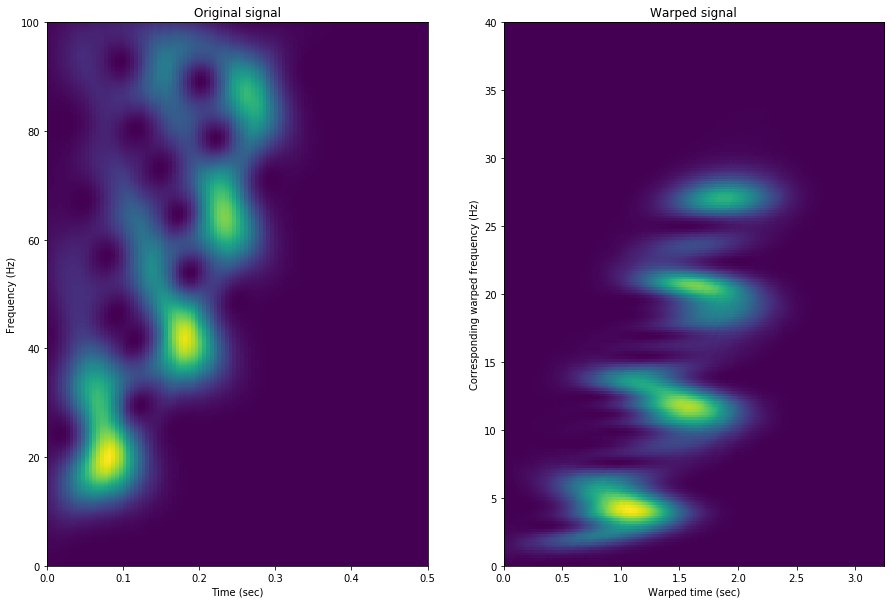

Continue to proceed with inverse warping


In [5]:
### Original signal
# STFT computation
NFFT = 1024
N_window = 31  # you need a short window to see the modes
b = np.arange(1, N_ok + 1)
b = b[np.newaxis, :]
h = np.hamming(N_window)
h = h[:, np.newaxis]
tfr = tfrstft(s_ok, b, NFFT, h)
spectro = abs(tfr) ** 2

# Figure

print('Here are the spectrograms')
print('Note that window length is highly different for')
print('the spectrogram of the original signal and the ')
print('spectrogram of the warped signal (look at codes and comments)')
print('')

freq = (np.arange(0, NFFT)) * fs / NFFT
plt.figure(figsize=(15.0, 10.0))
plt.subplot(121)
plt.imshow(spectro, extent=[time[0,0], time[0,-1], freq[0,0], freq[0,-1]],aspect='auto',origin='low')
plt.ylim([0, fs / 2])
plt.xlim([0, 0.5])  ### Adjust this to see better
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Original signal')



### Warped signal
# STFT computation
N_window_w = 301;  ### You need a long window to see the warped modes
wind = np.hamming(N_window_w)
wind = wind / np.linalg.norm(wind)
wind = wind[:, np.newaxis]
t = np.arange(1, M + 1)
t = t[np.newaxis, :]
tfr_w = tfrstft(s_w, t, NFFT, wind)
spectro_w = abs(tfr_w) ** 2

## Frequency axis of the warped signal
freq_w = np.arange(0, NFFT) * fs / NFFT


# Figure

plt.subplot(122)
plt.imshow(spectro_w, extent=[time_w[0,0], time_w[0,-1], freq_w[0,0], freq_w[0,-1]],aspect='auto',origin='low')
plt.ylim([0, 40])
plt.xlabel('Warped time (sec)')
plt.ylabel('Corresponding warped frequency (Hz)')
plt.title('Warped signal')
plt.show()

print('Continue to proceed with inverse warping')

## 6. Let's unwarp the signal

The blue signal is the original signal (same as the first figure)
The red dots is the signal after warping and inverse warping
Notice how they perfectly fit
 


/Users/evachamorro/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


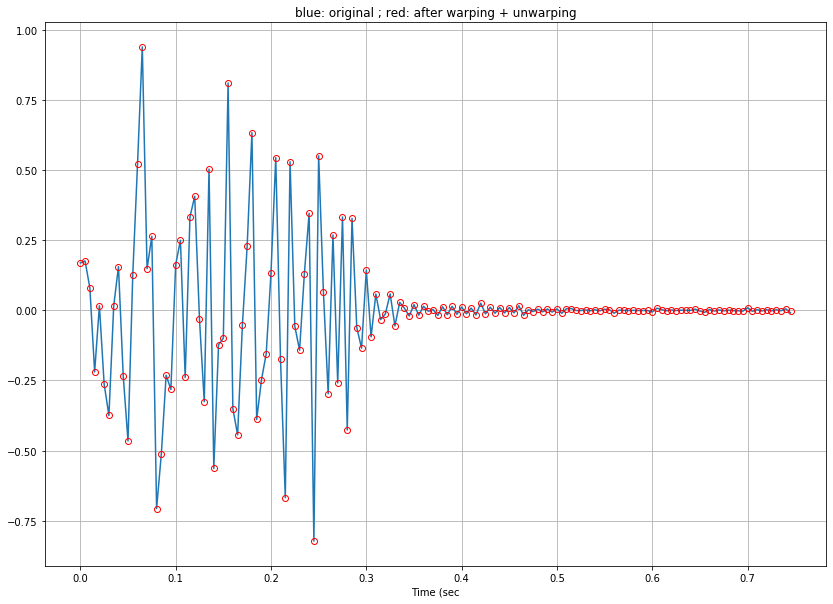

 
END


In [6]:
s_r = iwarp_temp_exa(s_w, fs_w, r, c1, fs, N_ok)

print('The blue signal is the original signal (same as the first figure)')
print('The red dots is the signal after warping and inverse warping')
print('Notice how they perfectly fit')
print(' ')

plt.figure(figsize=(14, 10))
plt.plot(time[0, :], s_ok[0, :])
plt.plot(time[0, :], s_r[:, 0], 'or', fillstyle='none')
plt.grid()
plt.xlabel('Time (sec')
plt.title('blue: original ; red: after warping + unwarping')
plt.show()


print(' ')
print('END')